<div>
<h1 align="center">Supervised learning linear regression</h1>
<h2 align="center"> By: Hans Michael Célestin </h2>
<br>

</div>


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

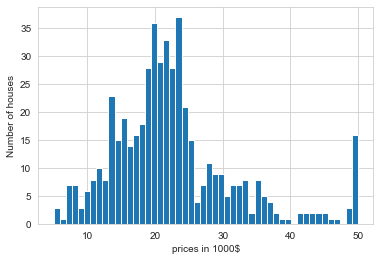

In [5]:
plt.hist(boston.target,bins=50)
plt.xlabel('prices in 1000$')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

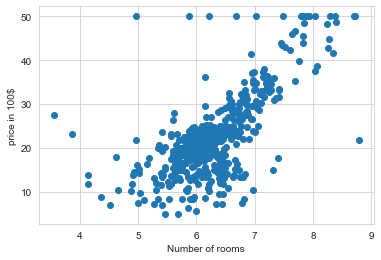

In [6]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('price in 100$')
plt.xlabel('Number of rooms')

In [7]:
boston_df = DataFrame(boston.data)
boston_df.columns =boston.feature_names
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
boston_df["price"] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


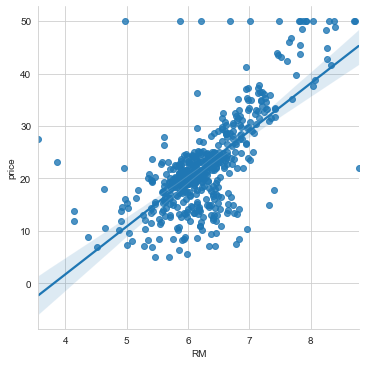

In [9]:
sns.lmplot('RM','price',data=boston_df)


Least square method


Univariate linear regression



In [12]:
X = boston_df.RM
X.shape

(506,)

In [61]:
X =np.vstack(boston_df.RM)
X.shape



(506, 1)

In [15]:
Y =boston_df.price

In [62]:
# Make the array shape to x, 1 for multiplication
X = np.array([[value,1.] for value in X ])
X


<ipython-input-62-4039d5d77c37>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array([[value,1.] for value in X ])


array([[array([6.575]), 1.0],
       [array([6.421]), 1.0],
       [array([7.185]), 1.0],
       ...,
       [array([6.976]), 1.0],
       [array([6.794]), 1.0],
       [array([6.03]), 1.0]], dtype=object)

In [64]:
m ,b =np.linalg.lstsq(X.astype(np.float),Y)[0]

<ipython-input-64-b864265b0d55>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m ,b =np.linalg.lstsq(X.astype(np.float),Y)[0]


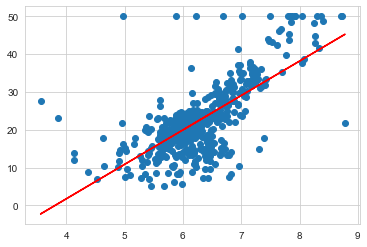

In [67]:
plt.plot(boston_df.RM,boston_df.price,'o')
x = boston_df.RM
plt.plot(x, m*x + b, 'r',label='best fit line')

Getting the error



In [69]:
result = np.linalg.lstsq(X.astype(np.float),Y)
error_total =result[1]
rmse = np.sqrt(error_total/len(X))
print('the root mean square error was %.2f' %rmse)

the root mean square error was 6.60


<ipython-input-69-fcd67b9f480b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X.astype(np.float),Y)


In [71]:
import sklearn
from sklearn.linear_model import LinearRegression

In [73]:
lreg = LinearRegression()

In [74]:
X_multi = boston_df.drop('price',1)
Y_target =boston_df.price

In [77]:
lreg.fit(X_multi,Y_target)
print('the estimated intercept coefficient is %.2f' % lreg.intercept_ )
print('the number of coefficients used a %d' % len(lreg.coef_) )

the estimated intercept coefficient is 36.46
the number of coefficients used a 13


In [80]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] =Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Using training and validating

In [86]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,boston_df.price)

In [89]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(379, 2) (127, 2) (379,) (127,)


In [91]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [92]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [94]:
print('fit a model X_train, and calculate the MSE with Y_train: %.2f' %np.mean((Y_train-pred_train)**2))
print('fit a model X_train, calcultate MSE with X_test and Y_test: %.2f' % np.mean((Y_test-pred_test)**2) )

fit a model X_train, and calculate the MSE with Y_train: 37.10
fit a model X_train, calcultate MSE with X_test and Y_test: 65.49


Residual Plots



Text(0.5, 1.0, 'Residual plots')

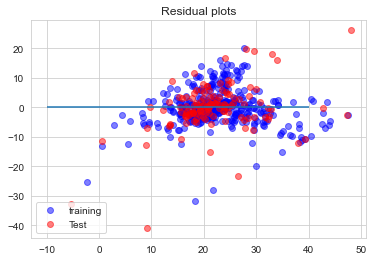

In [97]:
train = plt.scatter(pred_train, (pred_train -Y_train), c= 'b',alpha=0.5)
test =plt.scatter(pred_test,(pred_test-Y_test), c='r',alpha =0.5)
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('training','Test'), loc = 'lower left')
plt.title('Residual plots')